### Table of contents:


# Problem Statement or Business Problem


In this project we will be working with a data set, indicating whether it rain the next day in Australia, Yes or No? This column is Yes if the rain for that day was 1mm or more. We will try to create a model that will predict using the available data.

#### Attribute Information or Dataset Details:

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 4. Data Preprocessing:


Real-world data is often messy, incomplete, unstructured, inconsistent, redundant, sprinkled with wacky values. So, without deploying any Data Preprocessing techniques, it is almost impossible to gain insights from raw data.


# What exactly is Data Preprocessing?

Data preprocessing is a process of converting raw data to a suitable format to extract insights. It is the first and foremost step in the Data Science life cycle. Data Preprocessing makes sure that data is clean, organize and read-to-feed to the Machine Learning model.


In [3]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Dataset has two data types: float64, object
Except for the Date, Location columns, every column has missing values.
Let’s generate descriptive statistics for the dataset using the function describe() in pandas.

Descriptive Statistics: It is used to summarize and describe the features of data in a meaningful way to extract insights. It uses two types of statistic to describe or summarize data:

Measures of tendency

Measures of spread

In [4]:
df.describe(exclude=[object])


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


# 5. Finding Categorical and Numerical Features in a Data set:


In [6]:
# Categorical features in Dataset:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [7]:
# Numerical Features in Dataset:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# 6. Cardinality check for Categorical features:


#### 1.The accuracy, performance of a classifier not only depends on the model that we use, but also depends on how we preprocess data, and what kind of data you’re feeding to the classifier to learn.

#### 2. Many Machine learning algorithms like Linear Regression, Logistic Regression, k-nearest neighbors, etc. can handle only numerical data, so encoding categorical data to numeric becomes a necessary step.  But before jumping into encoding, check the cardinality of each categorical feature.

##### 3 .Cardinality: The number of unique values in each categorical feature is known as cardinality.

#### 4 .A feature with a high number of distinct/ unique values is a high cardinality feature. A categorical feature with hundreds of zip codes is the best example of a high cardinality feature.

##### 5 .This high cardinality feature poses many serious problems like it will increase the number of dimensions of data when that feature is encoded. This is not good for the model.

##### 6 .There are many ways to handle high cardinality, one would be feature engineering and the other is simply dropping that feature if it doesn’t add any value to the model.

Let’s find the cardinality for Categorical features:

In [8]:
for each_feature in categorical_features:
   unique_values = len(df[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

In [9]:
# Feature Engineering of Date column to decrease high cardinality:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [10]:
#Drop the rain colum
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Handling Missing values

##### 1 Machine learning algorithms can’t handle missing values and cause problems. So they need to be addressed in the first place. There are many techniques to identify and impute missing values.

##### 2  If a dataset contains missing values and loaded using pandas, then missing values get replaced with NaN(Not a Number) values. These NaN values can be identified using methods like isna() or isnull() and they can be imputed using fillna(). This process is known as Missing Data Imputation.

In [11]:
# Handle Missing Values
#Lets checl total percentage of missing values in our datsset
df.isnull().sum()*100/len(df)

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
year              0.000000
month             0.000000
day               0.000000
dtype: float64

In [12]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

#### Handling Missing values in Categorical Features:



In [13]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
df[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

#### Imputing the missing values in categorical features using the most frequent value which is mode:



In [14]:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [15]:
# Handling Missing values in Numerical features:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

In [16]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

-The RandomSampleImputer() works with both numerical and categorical variables.

-The RandomSampleImputer() replaces missing data with a random sample extracted from the variables in the training set.




In [17]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [18]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 19
Discrete feature Count 4
Continuous feature Count 15
Categorical feature Count 6


In [19]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

In [20]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [21]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [22]:
discrete_feature

['Cloud9am', 'Cloud3pm', 'year', 'month']

In [23]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [24]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

## . Outliers detection and treatment:
### What is an outlier?

An Outlier is an observation that lies an abnormal distance from other values in a given sample. They can be detected using visualization(like boxplots, scatter plots), Z-score, statistical and probabilistic algorithms, etc.

# Outlier Treatment to remove outliers from Numerical Features:



In [25]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

# 9. Exploratory Data Analysis:


Exploratory Data Analysis(EDA) is a technique used to analyze, visualize, investigate, interpret, discover and summarize data. It helps Data Scientists to extract trends, patterns, and relationships in data.

<AxesSubplot:>

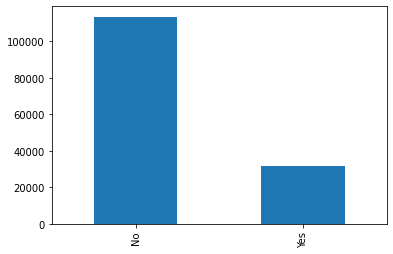

In [26]:
df['RainTomorrow'].value_counts().plot(kind='bar')


Looks like the Target variable is imbalanced. It has more ‘No’ values. If data is imbalanced, then it might decrease the performance of the model. As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let me keep it as it is.

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

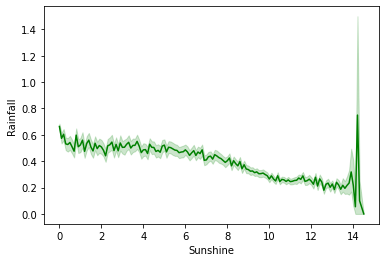

In [27]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green')


In the above line plot, the Sunshine feature is inversely proportional to the Rainfall feature.



<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

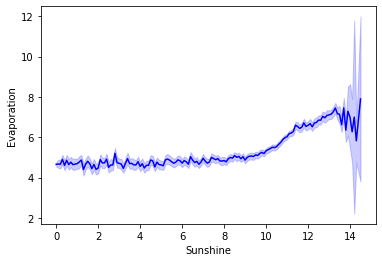

In [28]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='blue')


<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

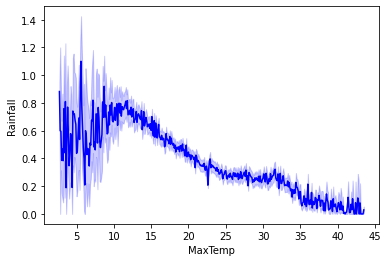

In [29]:
sns.lineplot(data=df,x='MaxTemp',y='Rainfall',color='blue')


<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

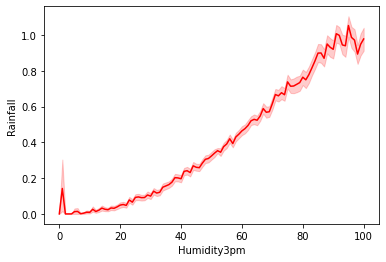

In [30]:
sns.lineplot(data=df,x='Humidity3pm',y='Rainfall',color='red')


# Encoding of Categorical Features:

Most Machine Learning Algorithms like Logistic Regression, Support Vector Machines, K Nearest Neighbours, etc. can’t handle categorical data. Hence, these categorical data need to converted to numerical data for modeling, which is called  Feature Encoding.

There are many feature encoding techniques like One code encoding, label encoding. But in this particular blog, I will be using replace() function to encode categorical data to numerical data.

In [31]:
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict




df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

df['Location'].replace(encode_data('Location'), inplace = True)

In [32]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,2.4,8.3,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,3.6,10.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,2.6,4.4,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,14.6,8.9,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.4,3.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In the above line plot, the Sunshine feature is proportional to the Evaporation feature.

### Correlation: 
Correlation is a statistic that helps to measure the strength of the relationship between two features. It is used in bivariate analysis. Correlation can be calculated with method corr() in pandas.



<AxesSubplot:>

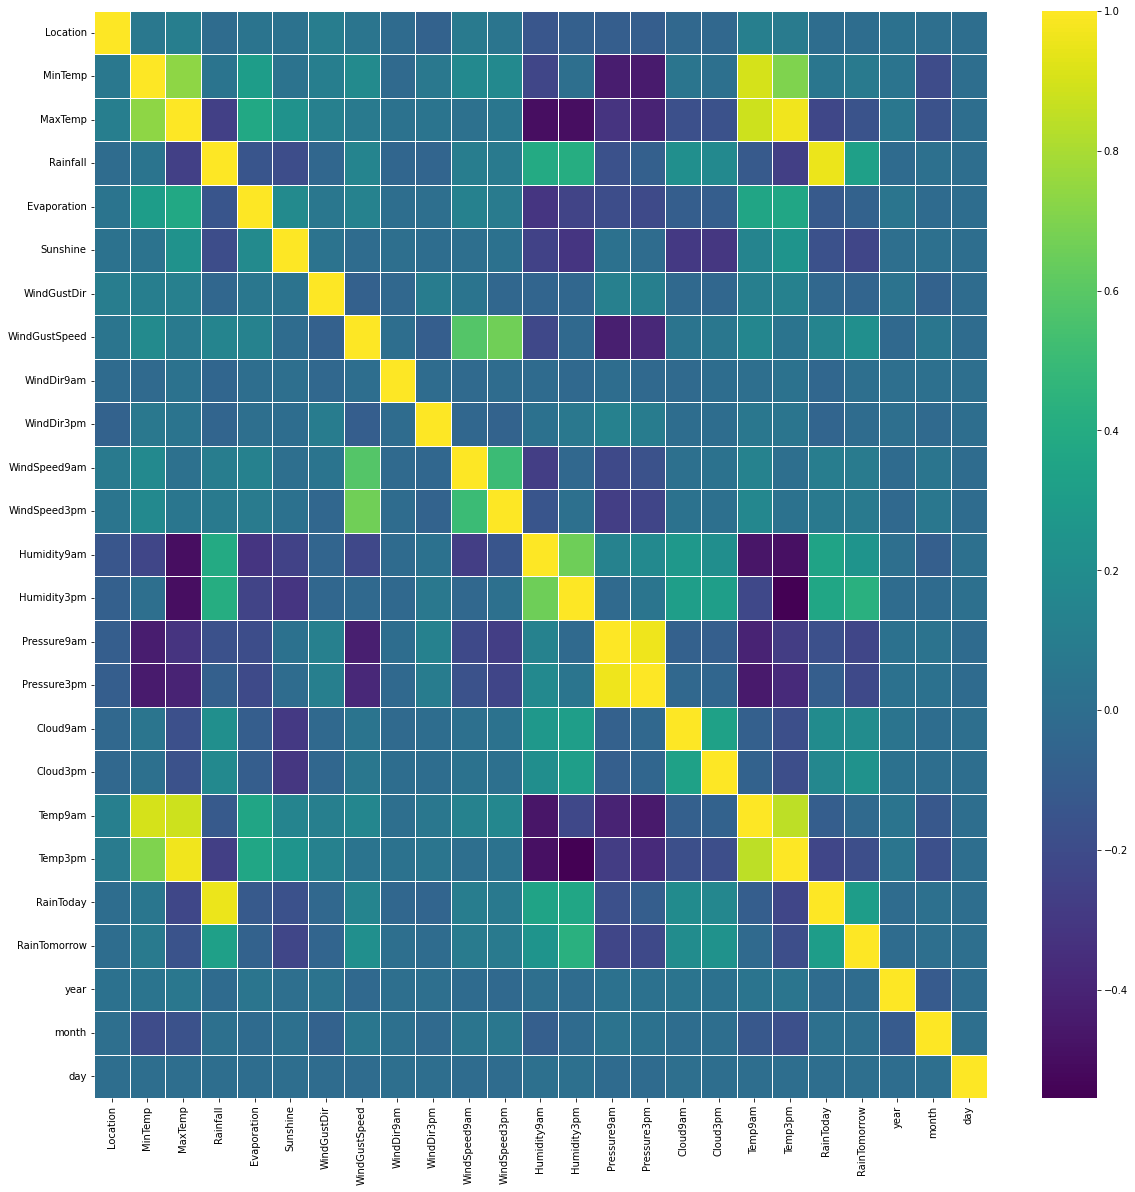

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


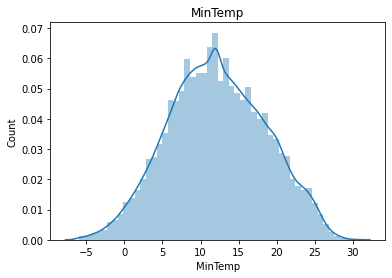

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


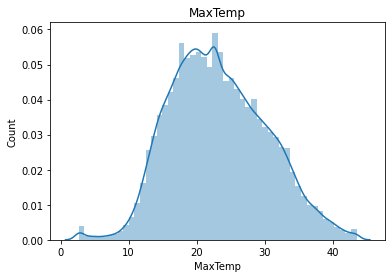

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


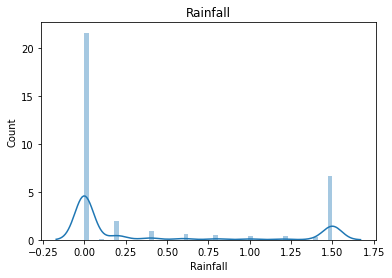

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


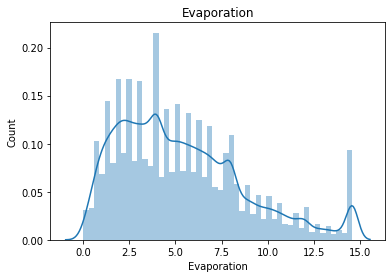

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


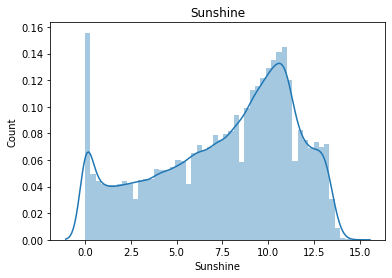

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


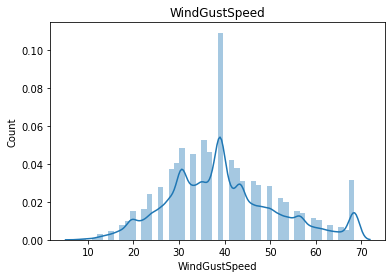

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


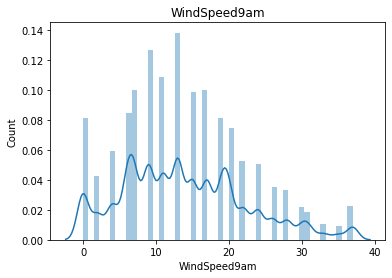

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


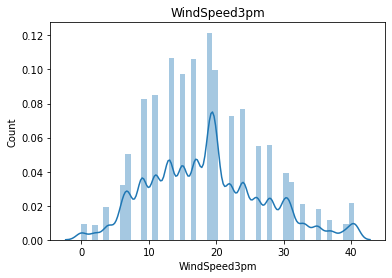

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


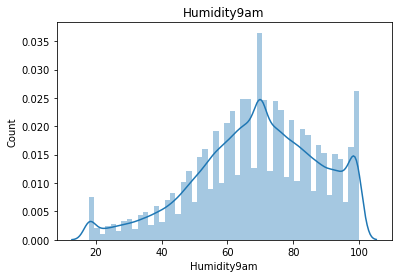

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


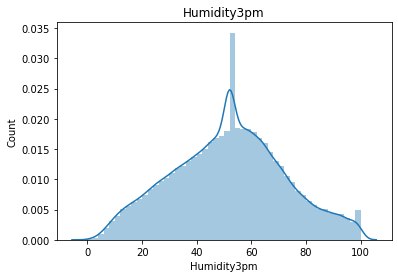

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


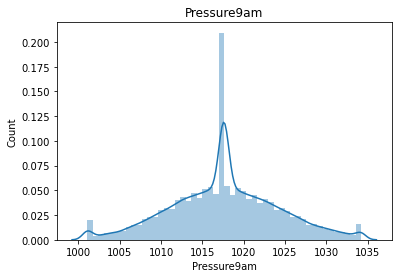

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


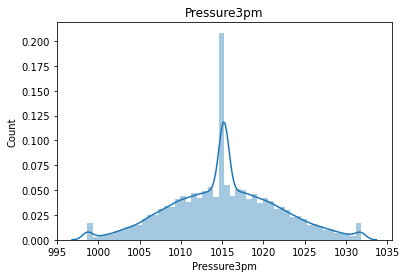

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


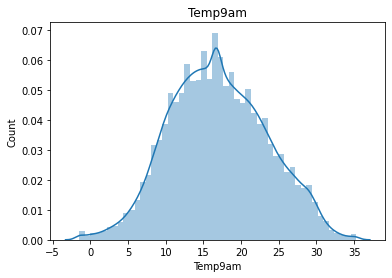

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


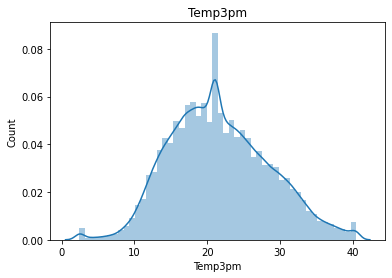

<Figure size 1080x1080 with 0 Axes>

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


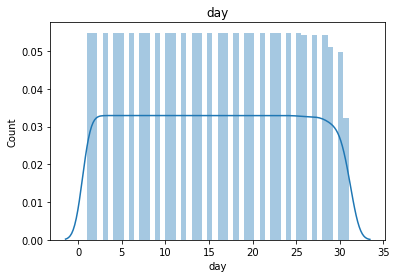

<Figure size 1080x1080 with 0 Axes>

In [34]:

for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

# Splitting data into Independent Features and Dependent Features:

For feature importance and feature scaling, we need to split data into independent and dependent features.

In [35]:
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In the above code,

X – Independent Features or Input features

y – Dependent Features or target label

12. Feature Importance:
###### 1 Machine Learning Model performance depends on features that are used to train a model. Feature importance describes which features are relevant to build a model.

##### 2 Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are at predicting a target variable. Feature importance helps in Feature Selection.

##### 3 We’ll be using ExtraTreesRegressor class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.03563634, 0.02900604, 0.027951  , 0.05200479, 0.0296868 ,
       0.03870081, 0.0293903 , 0.0560179 , 0.02999018, 0.0310688 ,
       0.03049285, 0.03189642, 0.03695535, 0.20817589, 0.03599381,
       0.05149809, 0.02798332, 0.03369515, 0.02733069, 0.02766345,
       0.03839867, 0.03018434, 0.02947134, 0.03080767])

<AxesSubplot:>

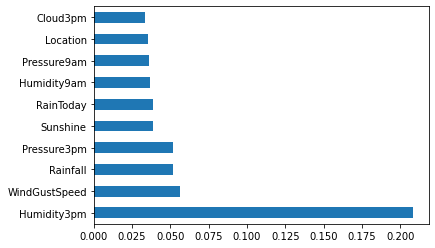

In [37]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

# Splitting Data into training and testing set:

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [39]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


### Feature Scaling:
Feature Scaling is a technique used to scale, normalize, standardize data in range(0,1). When each column of a dataset has distinct values, then it helps to scale data of each column to a common level. StandardScaler is a class used to implement feature scaling.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)


# Model Building:

#### In this article, I will be using a Logistic Regression algorithm to build a predictive model to predict whether or not it will rain tomorrow in Australia.

#### .1 Logistic Regression: It is a statistic-based algorithm used in classification problems. It allows us to predict the probability of an input belongs to a certain category.
#### 2. It uses the logit function or sigmoid function as a core.
#### 3 .According to the Data science community, logistic regression can solve 60% of existing classification problems.

In [42]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [43]:
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Evaluating Model Performance:



In [44]:
#accuracy_score() is a method used to calculate the accuracy of a model prediction on unseen data.
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score: 0.8433933727485219


In [45]:
## Checking for Underfitting and Overfitting:

print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8424309088409184
Test Data Score: 0.8433933727485219


The accuracy Score of training and testing data is comparable and almost equal. So, there is no question of underfitting and overfitting. And the model is generalizing well for new unseen data.

# Confusion Matrix:

A Confusion Matrix is used to summarize the performance of the classification problem. It gives a holistic view of how well the model is performing.

In [46]:
print(confusion_matrix(y_test,y_pred))


[[21549  1177]
 [ 3379  2987]]


In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.72      0.47      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



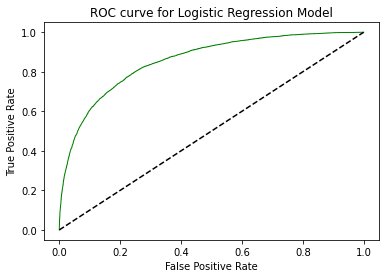

In [48]:

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7473693770332132

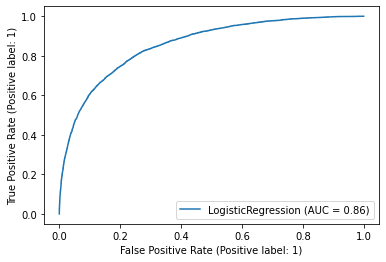

In [79]:
metrics.plot_roc_curve(classifier_logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

# Cross-Validation:

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.84188365 0.84149695 0.8448913  0.84037296 0.84243544]
Average cross-validation score: 0.8422160591939898


1. The logistic Regression model accuracy score is 0.84. The model does a very good job of predicting.
2. The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.
3. The mean accuracy score of cross-validation is almost the same as the original model accuracy score. So, the accuracy of the model may not be improved using Cross-validation.
 

In [58]:
import pickle

with open('scaler.pkl', 'wb') as file:

    pickle.dump(scaler, file) # here scaler is an object of StandardScaler class.

In [59]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file) # here classifier_logreg is trained model

# Cat Boost Algaritham

In [50]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train,y_train)

Learning rate set to 0.041591
0:	total: 196ms	remaining: 6m 32s
1:	total: 251ms	remaining: 4m 10s
2:	total: 287ms	remaining: 3m 11s
3:	total: 322ms	remaining: 2m 40s
4:	total: 354ms	remaining: 2m 21s
5:	total: 396ms	remaining: 2m 11s
6:	total: 427ms	remaining: 2m 1s
7:	total: 471ms	remaining: 1m 57s
8:	total: 505ms	remaining: 1m 51s
9:	total: 541ms	remaining: 1m 47s
10:	total: 570ms	remaining: 1m 43s
11:	total: 611ms	remaining: 1m 41s
12:	total: 651ms	remaining: 1m 39s
13:	total: 712ms	remaining: 1m 40s
14:	total: 745ms	remaining: 1m 38s
15:	total: 783ms	remaining: 1m 37s
16:	total: 828ms	remaining: 1m 36s
17:	total: 863ms	remaining: 1m 35s
18:	total: 919ms	remaining: 1m 35s
19:	total: 952ms	remaining: 1m 34s
20:	total: 986ms	remaining: 1m 32s
21:	total: 1.02s	remaining: 1m 31s
22:	total: 1.05s	remaining: 1m 30s
23:	total: 1.09s	remaining: 1m 29s
24:	total: 1.13s	remaining: 1m 29s
25:	total: 1.17s	remaining: 1m 28s
26:	total: 1.2s	remaining: 1m 27s
27:	total: 1.24s	remaining: 1m 27s
28

231:	total: 9.89s	remaining: 1m 15s
232:	total: 9.94s	remaining: 1m 15s
233:	total: 9.99s	remaining: 1m 15s
234:	total: 10.1s	remaining: 1m 15s
235:	total: 10.2s	remaining: 1m 16s
236:	total: 10.2s	remaining: 1m 15s
237:	total: 10.2s	remaining: 1m 15s
238:	total: 10.3s	remaining: 1m 15s
239:	total: 10.3s	remaining: 1m 15s
240:	total: 10.3s	remaining: 1m 15s
241:	total: 10.4s	remaining: 1m 15s
242:	total: 10.4s	remaining: 1m 15s
243:	total: 10.5s	remaining: 1m 15s
244:	total: 10.5s	remaining: 1m 15s
245:	total: 10.5s	remaining: 1m 15s
246:	total: 10.6s	remaining: 1m 15s
247:	total: 10.6s	remaining: 1m 15s
248:	total: 10.7s	remaining: 1m 15s
249:	total: 10.7s	remaining: 1m 14s
250:	total: 10.7s	remaining: 1m 14s
251:	total: 10.8s	remaining: 1m 14s
252:	total: 10.8s	remaining: 1m 14s
253:	total: 10.8s	remaining: 1m 14s
254:	total: 10.9s	remaining: 1m 14s
255:	total: 10.9s	remaining: 1m 14s
256:	total: 11s	remaining: 1m 14s
257:	total: 11s	remaining: 1m 14s
258:	total: 11s	remaining: 1m 14

466:	total: 18.9s	remaining: 1m 1s
467:	total: 18.9s	remaining: 1m 2s
468:	total: 19s	remaining: 1m 1s
469:	total: 19s	remaining: 1m 1s
470:	total: 19s	remaining: 1m 1s
471:	total: 19.1s	remaining: 1m 1s
472:	total: 19.1s	remaining: 1m 1s
473:	total: 19.2s	remaining: 1m 1s
474:	total: 19.2s	remaining: 1m 1s
475:	total: 19.2s	remaining: 1m 1s
476:	total: 19.3s	remaining: 1m 1s
477:	total: 19.3s	remaining: 1m 1s
478:	total: 19.3s	remaining: 1m 1s
479:	total: 19.4s	remaining: 1m 1s
480:	total: 19.4s	remaining: 1m 1s
481:	total: 19.5s	remaining: 1m 1s
482:	total: 19.5s	remaining: 1m 1s
483:	total: 19.5s	remaining: 1m 1s
484:	total: 19.6s	remaining: 1m 1s
485:	total: 19.6s	remaining: 1m 1s
486:	total: 19.6s	remaining: 1m 1s
487:	total: 19.7s	remaining: 1m
488:	total: 19.7s	remaining: 1m
489:	total: 19.7s	remaining: 1m
490:	total: 19.8s	remaining: 1m
491:	total: 19.8s	remaining: 1m
492:	total: 19.9s	remaining: 1m
493:	total: 19.9s	remaining: 1m
494:	total: 19.9s	remaining: 1m
495:	total: 20s

708:	total: 28.3s	remaining: 51.5s
709:	total: 28.3s	remaining: 51.4s
710:	total: 28.4s	remaining: 51.4s
711:	total: 28.4s	remaining: 51.4s
712:	total: 28.4s	remaining: 51.3s
713:	total: 28.5s	remaining: 51.3s
714:	total: 28.5s	remaining: 51.2s
715:	total: 28.6s	remaining: 51.2s
716:	total: 28.6s	remaining: 51.2s
717:	total: 28.6s	remaining: 51.1s
718:	total: 28.7s	remaining: 51.1s
719:	total: 28.7s	remaining: 51s
720:	total: 28.8s	remaining: 51s
721:	total: 28.8s	remaining: 50.9s
722:	total: 28.8s	remaining: 50.9s
723:	total: 28.9s	remaining: 50.9s
724:	total: 28.9s	remaining: 50.8s
725:	total: 28.9s	remaining: 50.8s
726:	total: 29s	remaining: 50.7s
727:	total: 29s	remaining: 50.7s
728:	total: 29s	remaining: 50.6s
729:	total: 29.1s	remaining: 50.6s
730:	total: 29.1s	remaining: 50.5s
731:	total: 29.1s	remaining: 50.5s
732:	total: 29.2s	remaining: 50.5s
733:	total: 29.2s	remaining: 50.4s
734:	total: 29.3s	remaining: 50.4s
735:	total: 29.3s	remaining: 50.3s
736:	total: 29.3s	remaining: 5

946:	total: 37.3s	remaining: 41.5s
947:	total: 37.4s	remaining: 41.5s
948:	total: 37.4s	remaining: 41.4s
949:	total: 37.5s	remaining: 41.4s
950:	total: 37.5s	remaining: 41.4s
951:	total: 37.5s	remaining: 41.3s
952:	total: 37.6s	remaining: 41.3s
953:	total: 37.6s	remaining: 41.2s
954:	total: 37.6s	remaining: 41.2s
955:	total: 37.7s	remaining: 41.1s
956:	total: 37.7s	remaining: 41.1s
957:	total: 37.7s	remaining: 41.1s
958:	total: 37.8s	remaining: 41s
959:	total: 37.8s	remaining: 41s
960:	total: 37.9s	remaining: 40.9s
961:	total: 37.9s	remaining: 40.9s
962:	total: 37.9s	remaining: 40.8s
963:	total: 38s	remaining: 40.8s
964:	total: 38s	remaining: 40.8s
965:	total: 38s	remaining: 40.7s
966:	total: 38.1s	remaining: 40.7s
967:	total: 38.1s	remaining: 40.7s
968:	total: 38.2s	remaining: 40.6s
969:	total: 38.2s	remaining: 40.6s
970:	total: 38.2s	remaining: 40.5s
971:	total: 38.3s	remaining: 40.5s
972:	total: 38.3s	remaining: 40.5s
973:	total: 38.4s	remaining: 40.4s
974:	total: 38.4s	remaining: 4

1180:	total: 46.4s	remaining: 32.1s
1181:	total: 46.4s	remaining: 32.1s
1182:	total: 46.4s	remaining: 32.1s
1183:	total: 46.5s	remaining: 32s
1184:	total: 46.5s	remaining: 32s
1185:	total: 46.5s	remaining: 31.9s
1186:	total: 46.6s	remaining: 31.9s
1187:	total: 46.6s	remaining: 31.9s
1188:	total: 46.7s	remaining: 31.8s
1189:	total: 46.7s	remaining: 31.8s
1190:	total: 46.7s	remaining: 31.7s
1191:	total: 46.8s	remaining: 31.7s
1192:	total: 46.8s	remaining: 31.7s
1193:	total: 46.8s	remaining: 31.6s
1194:	total: 46.9s	remaining: 31.6s
1195:	total: 46.9s	remaining: 31.5s
1196:	total: 46.9s	remaining: 31.5s
1197:	total: 47s	remaining: 31.5s
1198:	total: 47s	remaining: 31.4s
1199:	total: 47.1s	remaining: 31.4s
1200:	total: 47.1s	remaining: 31.3s
1201:	total: 47.1s	remaining: 31.3s
1202:	total: 47.2s	remaining: 31.2s
1203:	total: 47.2s	remaining: 31.2s
1204:	total: 47.2s	remaining: 31.2s
1205:	total: 47.3s	remaining: 31.1s
1206:	total: 47.3s	remaining: 31.1s
1207:	total: 47.4s	remaining: 31s
12

1414:	total: 55.4s	remaining: 22.9s
1415:	total: 55.5s	remaining: 22.9s
1416:	total: 55.5s	remaining: 22.8s
1417:	total: 55.5s	remaining: 22.8s
1418:	total: 55.6s	remaining: 22.7s
1419:	total: 55.6s	remaining: 22.7s
1420:	total: 55.6s	remaining: 22.7s
1421:	total: 55.7s	remaining: 22.6s
1422:	total: 55.7s	remaining: 22.6s
1423:	total: 55.7s	remaining: 22.6s
1424:	total: 55.8s	remaining: 22.5s
1425:	total: 55.8s	remaining: 22.5s
1426:	total: 55.9s	remaining: 22.4s
1427:	total: 55.9s	remaining: 22.4s
1428:	total: 55.9s	remaining: 22.4s
1429:	total: 56s	remaining: 22.3s
1430:	total: 56s	remaining: 22.3s
1431:	total: 56s	remaining: 22.2s
1432:	total: 56.1s	remaining: 22.2s
1433:	total: 56.1s	remaining: 22.2s
1434:	total: 56.2s	remaining: 22.1s
1435:	total: 56.2s	remaining: 22.1s
1436:	total: 56.2s	remaining: 22s
1437:	total: 56.3s	remaining: 22s
1438:	total: 56.3s	remaining: 22s
1439:	total: 56.4s	remaining: 21.9s
1440:	total: 56.4s	remaining: 21.9s
1441:	total: 56.4s	remaining: 21.8s
1442

1651:	total: 1m 4s	remaining: 13.6s
1652:	total: 1m 4s	remaining: 13.6s
1653:	total: 1m 4s	remaining: 13.5s
1654:	total: 1m 4s	remaining: 13.5s
1655:	total: 1m 4s	remaining: 13.4s
1656:	total: 1m 4s	remaining: 13.4s
1657:	total: 1m 4s	remaining: 13.4s
1658:	total: 1m 4s	remaining: 13.3s
1659:	total: 1m 4s	remaining: 13.3s
1660:	total: 1m 4s	remaining: 13.2s
1661:	total: 1m 4s	remaining: 13.2s
1662:	total: 1m 4s	remaining: 13.2s
1663:	total: 1m 5s	remaining: 13.1s
1664:	total: 1m 5s	remaining: 13.1s
1665:	total: 1m 5s	remaining: 13.1s
1666:	total: 1m 5s	remaining: 13s
1667:	total: 1m 5s	remaining: 13s
1668:	total: 1m 5s	remaining: 12.9s
1669:	total: 1m 5s	remaining: 12.9s
1670:	total: 1m 5s	remaining: 12.9s
1671:	total: 1m 5s	remaining: 12.8s
1672:	total: 1m 5s	remaining: 12.8s
1673:	total: 1m 5s	remaining: 12.7s
1674:	total: 1m 5s	remaining: 12.7s
1675:	total: 1m 5s	remaining: 12.7s
1676:	total: 1m 5s	remaining: 12.6s
1677:	total: 1m 5s	remaining: 12.6s
1678:	total: 1m 5s	remaining: 12

1881:	total: 1m 13s	remaining: 4.6s
1882:	total: 1m 13s	remaining: 4.56s
1883:	total: 1m 13s	remaining: 4.52s
1884:	total: 1m 13s	remaining: 4.48s
1885:	total: 1m 13s	remaining: 4.44s
1886:	total: 1m 13s	remaining: 4.4s
1887:	total: 1m 13s	remaining: 4.37s
1888:	total: 1m 13s	remaining: 4.33s
1889:	total: 1m 13s	remaining: 4.29s
1890:	total: 1m 13s	remaining: 4.25s
1891:	total: 1m 13s	remaining: 4.21s
1892:	total: 1m 13s	remaining: 4.17s
1893:	total: 1m 13s	remaining: 4.13s
1894:	total: 1m 13s	remaining: 4.09s
1895:	total: 1m 13s	remaining: 4.05s
1896:	total: 1m 13s	remaining: 4.01s
1897:	total: 1m 13s	remaining: 3.98s
1898:	total: 1m 14s	remaining: 3.94s
1899:	total: 1m 14s	remaining: 3.9s
1900:	total: 1m 14s	remaining: 3.86s
1901:	total: 1m 14s	remaining: 3.82s
1902:	total: 1m 14s	remaining: 3.78s
1903:	total: 1m 14s	remaining: 3.74s
1904:	total: 1m 14s	remaining: 3.7s
1905:	total: 1m 14s	remaining: 3.66s
1906:	total: 1m 14s	remaining: 3.63s
1907:	total: 1m 14s	remaining: 3.59s
1908:

In [51]:

print("Train Data Score: {}".format(cat.score(X_train, y_train)))
print("Test Data Score: {}".format(cat.score(X_test, y_test)))

Train Data Score: 0.8907431596315138
Test Data Score: 0.8619208029698886


In [52]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21614  1112]
 [ 2905  3461]]
0.8619208029698886
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22726
           1       0.76      0.54      0.63      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



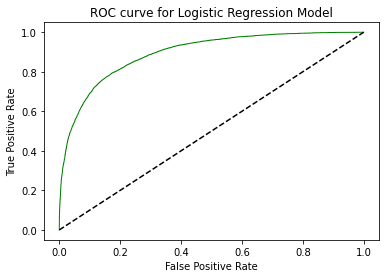

In [53]:

y_pred_logreg_proba = cat.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

/home/stellapps/Documents/project_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7473693770332132

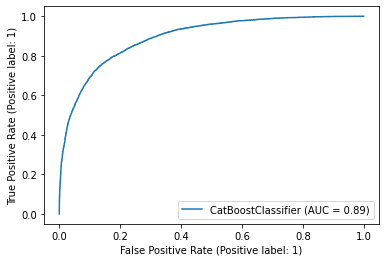

In [54]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [60]:
import pickle

with open('scaler.pkl', 'wb') as file:

    pickle.dump(scaler, file) # here scaler is an object of StandardScaler class.

In [61]:
with open('catboost.pkl', 'wb') as file:
    pickle.dump(cat, file) # here classifier_logreg is trained model